### <p style="text-align: center;"> ![alt text](./cilss.png)</p>
# <p style="text-align: center;">AGHRYMET RCC-WAS</p>
&copy; HOUNGNIBO 2024

# **Comprehensive Pandas Tutorial**

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## **2. Loading and Exploring the Data**

In [5]:

# Load monthly rainfall data from a CSV file
# Replace 'rainfall_data.csv' with the actual file path
df = pd.read_csv('rainfall_data.csv')

# Display the first few rows
df.head()


Date    Rainfall
0  2000-01-01  183.693736
1  2000-02-01   88.496289
2  2000-03-01  203.755925
3  2000-04-01  141.780102
4  2000-05-01   89.701280

In [6]:

# Display basic information about the DataFrame
df.info()

# Display summary statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      252 non-null    object 
 1   Rainfall  252 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.1+ KB


Rainfall
count  252.000000
mean   157.071672
std     81.695705
min     21.535351
25%     88.516044
50%    153.515452
75%    218.059639
max    299.636290

## **3. Handling Date and Time**

In [7]:

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)


## **4. Data Cleaning**

In [8]:

# Check for missing values
df.isnull().sum()

# Fill missing rainfall values with the monthly average
df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].mean())


## **5. Exploratory Data Analysis**

In [9]:

# Calculate total, average, and max monthly rainfall
total_rainfall = df['Rainfall'].sum()
avg_rainfall = df['Rainfall'].mean()
max_rainfall = df['Rainfall'].max()

print(f"Total Rainfall: {total_rainfall} mm")
print(f"Average Monthly Rainfall: {avg_rainfall:.2f} mm")
print(f"Max Monthly Rainfall: {max_rainfall} mm")


Total Rainfall: 39582.06143316267 mm
Average Monthly Rainfall: 157.07 mm
Max Monthly Rainfall: 299.6362897840605 mm


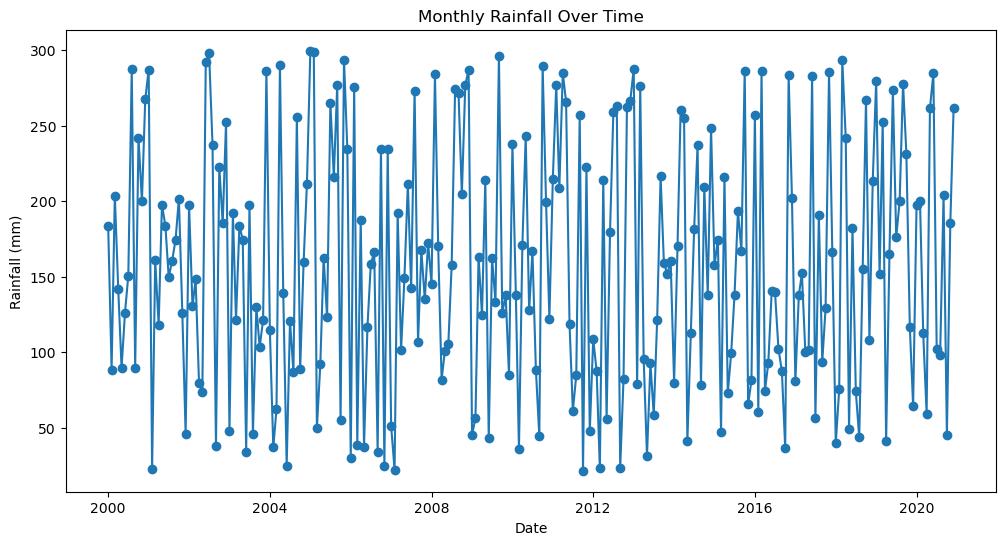

In [10]:

# Plot the monthly rainfall time series
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Rainfall'], marker='o')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.title('Monthly Rainfall Over Time')
plt.show()


## **6. Resampling Data**

In [11]:

# Resample data to calculate annual rainfall totals
annual_rainfall = df['Rainfall'].resample('Y').sum()
annual_rainfall


/tmp/ipykernel_146985/2226250138.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_rainfall = df['Rainfall'].resample('Y').sum()


Date
2000-12-31    2070.691638
2001-12-31    1828.375592
2002-12-31    2155.099683
2003-12-31    1638.573123
2004-12-31    1591.282000
2005-12-31    2367.447259
2006-12-31    1538.669756
2007-12-31    1724.251556
2008-12-31    2360.615865
2009-12-31    1587.596806
2010-12-31    1863.856808
2011-12-31    2064.543198
2012-12-31    1825.209882
2013-12-31    1729.676353
2014-12-31    2012.428758
2015-12-31    1698.988222
2016-12-31    1762.902256
2017-12-31    1777.259668
2018-12-31    1742.303347
2019-12-31    2229.906532
2020-12-31    2012.383130
Freq: YE-DEC, Name: Rainfall, dtype: float64

In [14]:

# Resample data to calculate seasonal (quarterly) averages
seasonal_avg_rainfall = df['Rainfall'].resample('QE').mean()
seasonal_avg_rainfall

# Calculate three-monthly seasonal mean rainfall
three_monthly_seasonal_rainfall = df['Rainfall'].resample('QE-NOV').mean()

## **7. Grouping and Aggregating**

In [15]:

# Group by month to calculate the average rainfall for each month across all years
df['Month'] = df.index.month  # Extract month from the datetime index
monthly_avg_rainfall = df.groupby('Month')['Rainfall'].mean()
monthly_avg_rainfall


Month
1     159.194481
2     140.954203
3     155.174568
4     150.177410
5     129.502506
6     150.290851
7     153.078198
8     166.876769
9     156.088050
10    162.043742
11    175.185085
12    186.294207
Name: Rainfall, dtype: float64

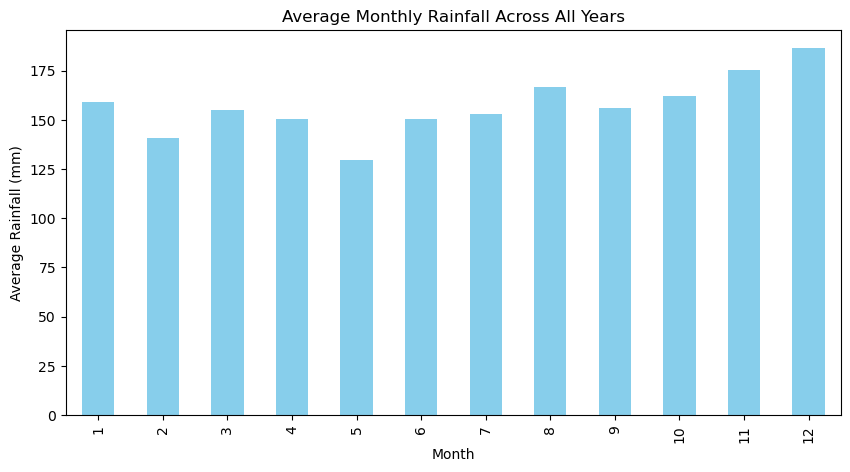

In [16]:

# Plot average rainfall by month
plt.figure(figsize=(10, 5))
monthly_avg_rainfall.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Average Rainfall (mm)')
plt.title('Average Monthly Rainfall Across All Years')
plt.show()


## **8. Detecting Anomalies**

In [17]:

# Identify months with rainfall above a certain threshold (e.g., 200 mm)
extreme_rainfall = df[df['Rainfall'] > 200]
extreme_rainfall


Rainfall  Month
Date                         
2000-03-01  203.755925      3
2000-08-01  287.326462      8
2000-10-01  242.035286     10
2000-12-01  267.522359     12
2001-01-01  286.983849      1
...                ...    ...
2020-02-01  200.355499      2
2020-05-01  261.427366      5
2020-06-01  284.834766      6
2020-09-01  203.847631      9
2020-12-01  261.992363     12

[80 rows x 2 columns]

## **9. Rolling and Moving Averages**

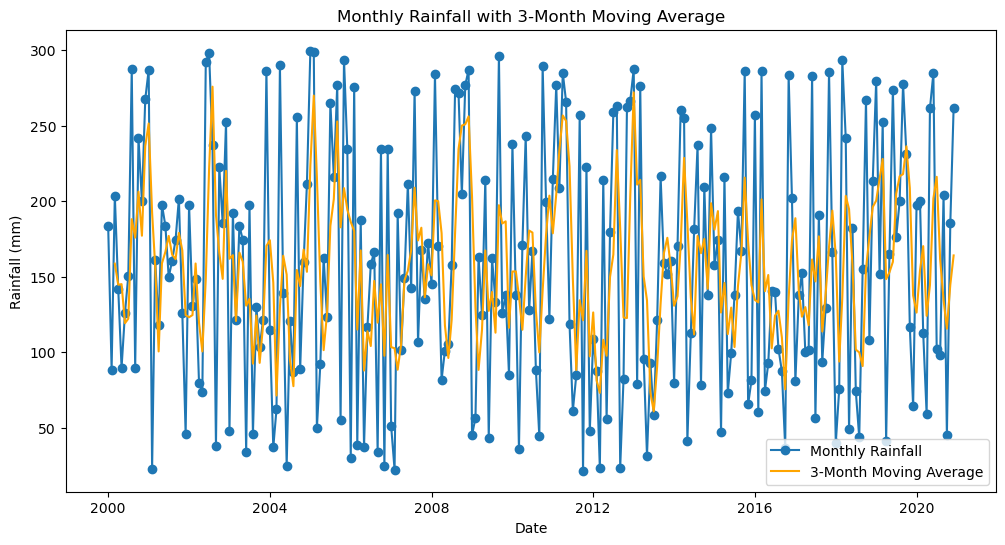

In [18]:

# Calculate a 3-month moving average
df['3_Month_MA'] = df['Rainfall'].rolling(window=3).mean()

# Plot the original and 3-month moving average rainfall
plt.figure(figsize=(12, 6))
plt.plot(df['Rainfall'], label='Monthly Rainfall', marker='o')
plt.plot(df['3_Month_MA'], label='3-Month Moving Average', color='orange')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.title('Monthly Rainfall with 3-Month Moving Average')
plt.legend()
plt.show()


## **10. Saving Cleaned Data**

In [ ]:

# Save the cleaned and processed rainfall data to a new CSV file
df.to_csv('processed_rainfall_data.csv')


## More on pandas https://pandas.pydata.org/docs/user_guide/index.html